In [22]:
import pandas as pd
import numpy as np
import random
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

There are 1.183.747 rows in total in each dataset. Each row represents 1 workpiece.

In [2]:
#quick row check for each part of the dataset
for i in ["train_date.csv", "train_numeric.csv", "train_categorical.csv"]:
    print('Number of rows for ' + i + ': {}'.format(len(pd.read_csv(i, usecols=[0]))))

Number of rows for train_date.csv: 1183747
Number of rows for train_numeric.csv: 1183747
Number of rows for train_categorical.csv: 1183747


All 3 parts of the dataset have different number of columns. Columns represent stations and corresponding features. Categorical data has by far most columns.

In [3]:
#quick column check for each part of the dataset
for i in ["train_date.csv", "train_numeric.csv", "train_categorical.csv"]:
    print('Number of columns for ' + i + ': {}'.format(len(pd.read_csv(i, nrows=0).columns)))

Number of columns for train_date.csv: 1157
Number of columns for train_numeric.csv: 970
Number of columns for train_categorical.csv: 2141


Data exploration starts with numerical data.

In [8]:
#display first 10 rows
pd.read_csv('train_numeric.csv', nrows=10)

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,13,0.003,0.019,0.294,0.312,0.031,0.161,0.022,0.088,-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,18,-0.016,-0.041,-0.179,-0.179,-0.056,0.161,-0.007,-0.032,-0.082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
train_numeric=pd.read_csv('train_numeric.csv', nrows=1)
numeric_columns=train_numeric.columns.tolist()
numeric_columns_unique=np.unique([x[0:6] for x in numeric_columns])

In [10]:
#number of columns for numeric data
len(numeric_columns)

970

In [11]:
#list of numeric stations (Id and response omitted)
numeric_columns_unique[1:-1]

array(['L0_S0_', 'L0_S10', 'L0_S11', 'L0_S12', 'L0_S13', 'L0_S14',
       'L0_S15', 'L0_S16', 'L0_S17', 'L0_S18', 'L0_S19', 'L0_S1_',
       'L0_S20', 'L0_S21', 'L0_S22', 'L0_S23', 'L0_S2_', 'L0_S3_',
       'L0_S4_', 'L0_S5_', 'L0_S6_', 'L0_S7_', 'L0_S8_', 'L0_S9_',
       'L1_S24', 'L1_S25', 'L2_S26', 'L2_S27', 'L2_S28', 'L3_S29',
       'L3_S30', 'L3_S31', 'L3_S32', 'L3_S33', 'L3_S34', 'L3_S35',
       'L3_S36', 'L3_S37', 'L3_S38', 'L3_S39', 'L3_S40', 'L3_S41',
       'L3_S43', 'L3_S44', 'L3_S45', 'L3_S47', 'L3_S48', 'L3_S49',
       'L3_S50', 'L3_S51'], dtype='<U6')

Compared to date data, numeric data only contains 50 stations. Stations 42 and 46 are missing.

In [12]:
#number of columns for numeric data
len(numeric_columns_unique[1:-1])

50

In [13]:
#first 10 features
[x[3:] for x in numeric_columns[1:]][0:10]

['S0_F0',
 'S0_F2',
 'S0_F4',
 'S0_F6',
 'S0_F8',
 'S0_F10',
 'S0_F12',
 'S0_F14',
 'S0_F16',
 'S0_F18']

Station 25 has most features (284). Station 32 only has 1 feature.

In [14]:
#count features for each station
Counter([x[3:6] for x in numeric_columns[1:-1]]).most_common()

[('S25', 284),
 ('S24', 229),
 ('S30', 68),
 ('S29', 53),
 ('S21', 14),
 ('S22', 14),
 ('S23', 14),
 ('S26', 14),
 ('S27', 14),
 ('S28', 14),
 ('S41', 14),
 ('S0_', 12),
 ('S9_', 12),
 ('S10', 12),
 ('S11', 12),
 ('S12', 12),
 ('S47', 11),
 ('S33', 10),
 ('S2_', 9),
 ('S3_', 9),
 ('S14', 9),
 ('S15', 9),
 ('S35', 8),
 ('S36', 8),
 ('S40', 8),
 ('S43', 8),
 ('S44', 8),
 ('S49', 7),
 ('S50', 7),
 ('S48', 6),
 ('S45', 5),
 ('S31', 4),
 ('S34', 4),
 ('S37', 4),
 ('S39', 4),
 ('S51', 4),
 ('S6_', 3),
 ('S7_', 3),
 ('S8_', 3),
 ('S18', 3),
 ('S19', 3),
 ('S20', 3),
 ('S38', 3),
 ('S1_', 2),
 ('S4_', 2),
 ('S5_', 2),
 ('S13', 2),
 ('S16', 2),
 ('S17', 2),
 ('S32', 1)]

In [59]:
from collections import Counter, defaultdict
ID_COL = 'Id'

def plot_feature_count(filepath, index_col=ID_COL):
    df = pd.read_csv(filepath,
                     nrows=1,
                     index_col=index_col)
    stations = defaultdict(set)
    for col in df.columns:
        try:
            split = col.split('_')
            station = '_'.join(split[:2])
            feature = split[2]
            stations[station].add(feature)
        except:
            pass

    feature_counts = {s: len(f) for s, f in stations.items()}
    index = [ k for k in feature_counts]
    counts = [v for v in feature_counts.values()]
    to_plot = pd.DataFrame([index, counts]).T.rename({0: 'station', 1:'feature_count'}, axis=1).set_index('station')
    ax = to_plot.plot.bar(rot=70, alpha=0.75, figsize=(16, 9), fontsize='large', ylabel='feature_count', legend=False);

Visualization of feature count per station for numeric data

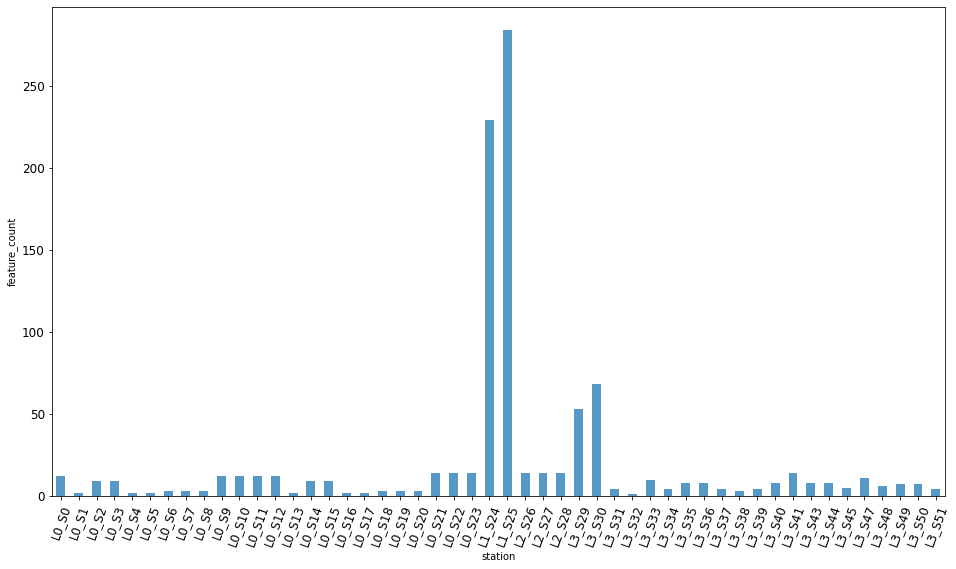

In [60]:
plot_feature_count("train_numeric.csv")

Heatmaps allow for a quick overlook and reveal patterns in data. White spaces are NaN. Colored spaces are data points. Data points are mostly located in the first stations of line 0, thin out around line1 station 24 to station 25 on line 1 and reoccur in blocks between station 29-37 on line 3 (largest data chunks). Interestingly, data points in station 40-50 on line 3 seem to only occur when there are no data points in previous stations 29-37 on line 3. This allows for assumptions about types of machines or workpieces involved in the production process.

Numeric data is normalized as values range from +1 to -1 and spread around 0, as can also be seen in the right colobar.

<AxesSubplot:>

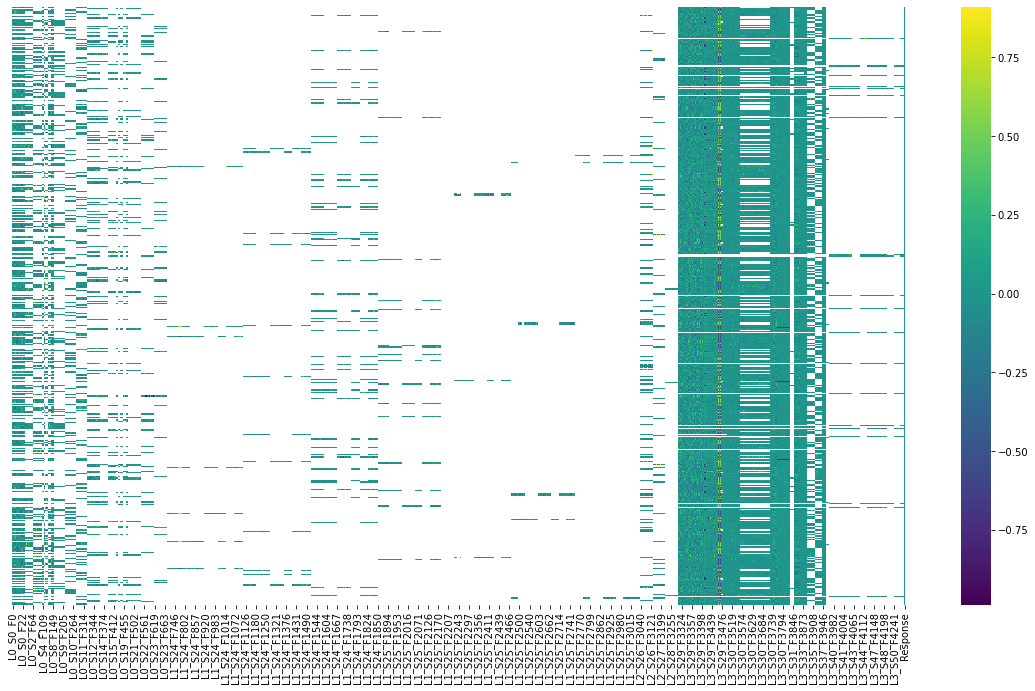

In [11]:
#heatmap 1 for first 100.000 rows in numeric data
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_numeric.csv", nrows=100000).iloc[0:500, 1:], 
            yticklabels=False, cbar=True, cmap='viridis')

<AxesSubplot:>

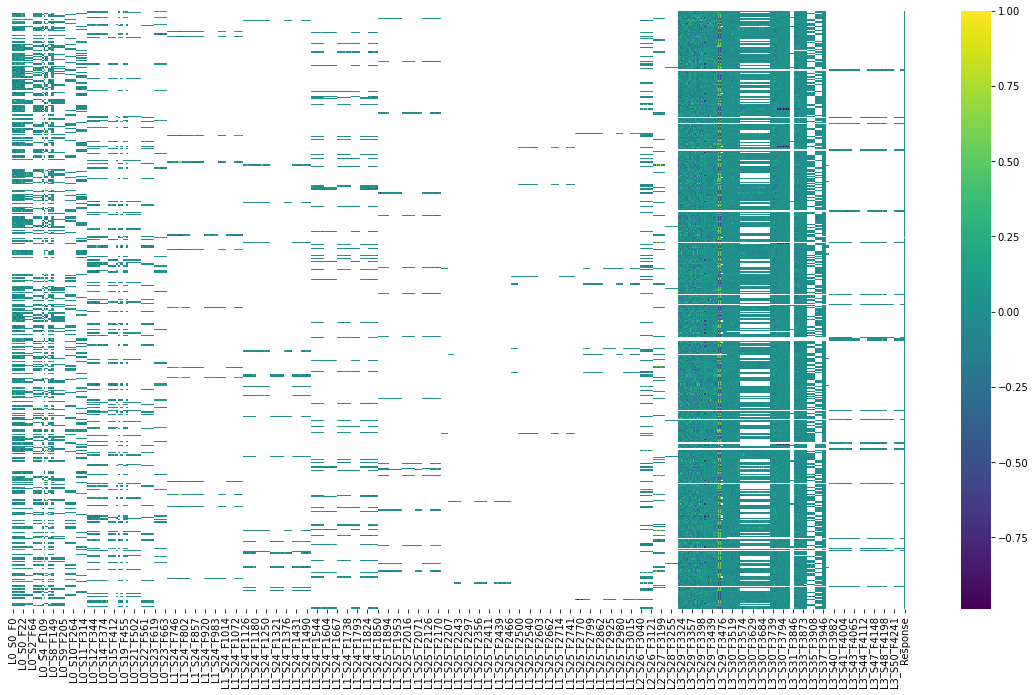

In [12]:
#heatmap 2 for the last 100.000 rows in numeric data
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_numeric.csv", 
            skiprows=range(1,1183748-100000+1), nrows=100000).iloc[0:500, 1:], 
            yticklabels=False, cbar=True, cmap='viridis')

Having a look at the numeric heatmap for stations in line 2 and 3, we can see 2 features in station 29 with striking values, occasionally omitted measurements in station 30, frequently omitted measurements in station 31 and mutually exclusive stations (e.g. 35 and 36).

<AxesSubplot:>

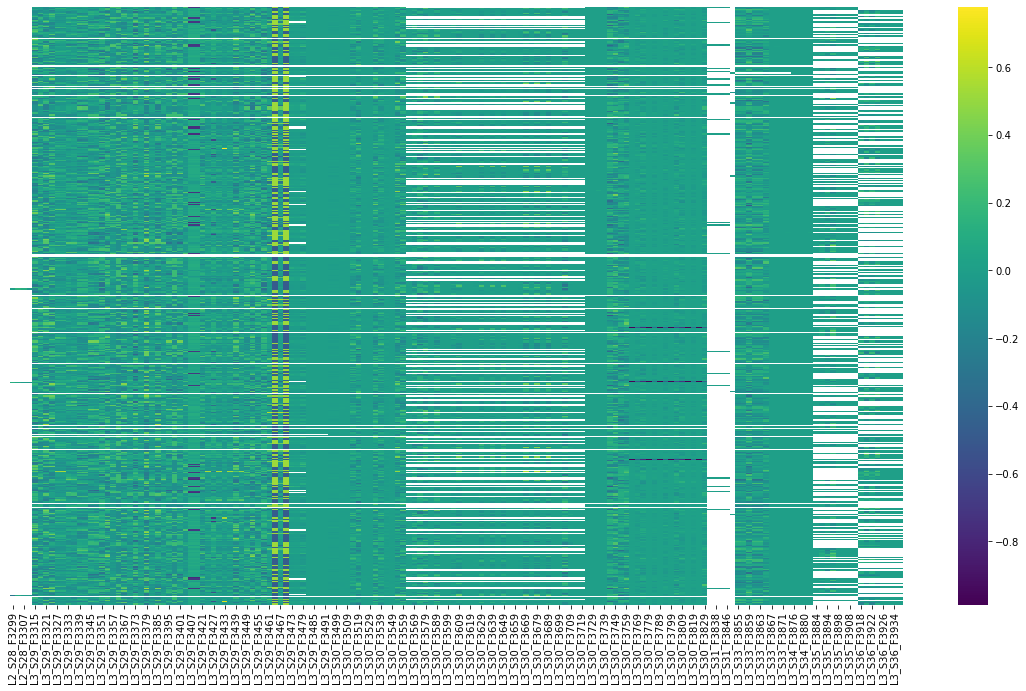

In [71]:
#heatmap 3 for first 100.000 rows in numeric data
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_numeric.csv", nrows=100000).iloc[0:500, 720:880], 
            yticklabels=False, cbar=True, cmap='viridis')

As can be seen in the below heatmap, feature F3464 and F3470 have contrary values (approximately +0.4 and -0.4). Feature F3467 lies in between.

<AxesSubplot:>

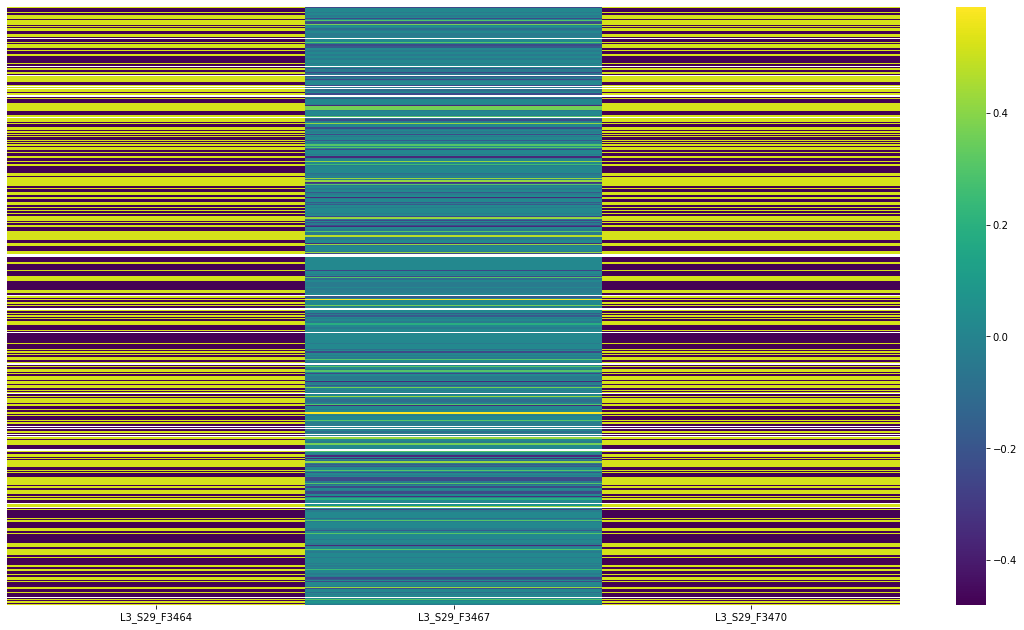

In [85]:
#heatmap 4 for first 100.000 rows in numeric data
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_numeric.csv", nrows=100000).iloc[0:500, 767:770], 
            yticklabels=False, cbar=True, cmap='viridis')

Station 35 and 36 are mutually exclusive. They have the same number of features and might be interchangeably used for the same task to avoid a critical load factor of workpieces.

<AxesSubplot:>

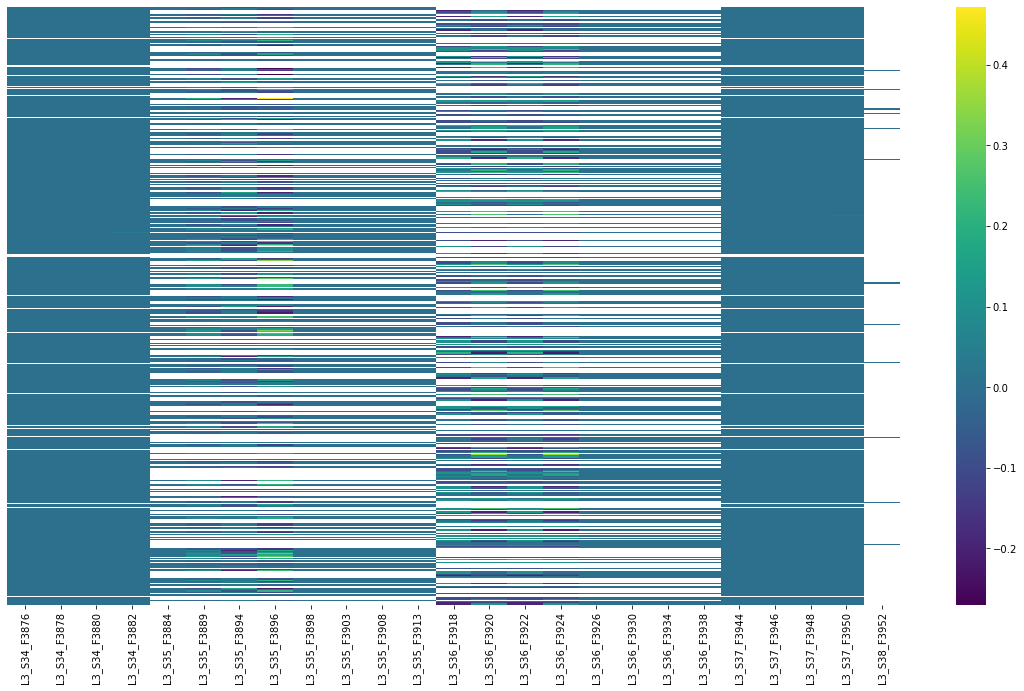

In [78]:
#heatmap 5 for first 100.000 rows in numeric data
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_numeric.csv", nrows=100000).iloc[0:500, 860:885], 
            yticklabels=False, cbar=True, cmap='viridis')

Now we have a closer look at the features of date dataset.

In [15]:
train_date=pd.read_csv('train_date.csv', nrows=1)
date_columns=train_date.columns.tolist()
date_columns_unique=np.unique([x[0:6] for x in date_columns])

In [16]:
#number of columns for date data
len(date_columns)

1157

In [17]:
#display first 10 rows
pd.read_csv('train_date.csv', nrows=10)

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,13,1331.66,1331.66,1331.66,1331.66,1331.66,1331.66,1331.66,1331.66,1331.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18,517.64,517.64,517.64,517.64,517.64,517.64,517.64,517.64,517.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#list of all stations (id omitted)
date_columns_unique[1:]

array(['L0_S0_', 'L0_S10', 'L0_S11', 'L0_S12', 'L0_S13', 'L0_S14',
       'L0_S15', 'L0_S16', 'L0_S17', 'L0_S18', 'L0_S19', 'L0_S1_',
       'L0_S20', 'L0_S21', 'L0_S22', 'L0_S23', 'L0_S2_', 'L0_S3_',
       'L0_S4_', 'L0_S5_', 'L0_S6_', 'L0_S7_', 'L0_S8_', 'L0_S9_',
       'L1_S24', 'L1_S25', 'L2_S26', 'L2_S27', 'L2_S28', 'L3_S29',
       'L3_S30', 'L3_S31', 'L3_S32', 'L3_S33', 'L3_S34', 'L3_S35',
       'L3_S36', 'L3_S37', 'L3_S38', 'L3_S39', 'L3_S40', 'L3_S41',
       'L3_S42', 'L3_S43', 'L3_S44', 'L3_S45', 'L3_S46', 'L3_S47',
       'L3_S48', 'L3_S49', 'L3_S50', 'L3_S51'], dtype='<U6')

In [19]:
#total number of stations, ranging from station 0 to 51
len(date_columns_unique[1:])

52

In [105]:
#first 10 features
[x[3:] for x in date_columns[1:]][0:10]

['S0_D1',
 'S0_D3',
 'S0_D5',
 'S0_D7',
 'S0_D9',
 'S0_D11',
 'S0_D13',
 'S0_D15',
 'S0_D17',
 'S0_D19']

We count features for each station. Station 25 has most features (333), followed by station 24 (288), both in line 1. Stations 32 and 46 have the least features (1).

In [109]:
#count features for each station
Counter([x[3:6] for x in date_columns[1:]]).most_common()

[('S25', 333),
 ('S24', 288),
 ('S30', 68),
 ('S29', 63),
 ('S26', 26),
 ('S27', 26),
 ('S28', 26),
 ('S41', 18),
 ('S21', 15),
 ('S22', 15),
 ('S23', 15),
 ('S9_', 13),
 ('S10', 13),
 ('S11', 13),
 ('S0_', 12),
 ('S12', 12),
 ('S47', 11),
 ('S33', 10),
 ('S2_', 9),
 ('S3_', 9),
 ('S14', 9),
 ('S15', 9),
 ('S35', 8),
 ('S36', 8),
 ('S40', 8),
 ('S42', 8),
 ('S43', 8),
 ('S44', 8),
 ('S48', 7),
 ('S49', 7),
 ('S50', 7),
 ('S37', 6),
 ('S6_', 5),
 ('S7_', 5),
 ('S18', 5),
 ('S19', 5),
 ('S34', 5),
 ('S45', 5),
 ('S51', 5),
 ('S8_', 4),
 ('S20', 4),
 ('S31', 4),
 ('S39', 4),
 ('S38', 3),
 ('S1_', 2),
 ('S4_', 2),
 ('S5_', 2),
 ('S13', 2),
 ('S16', 2),
 ('S17', 2),
 ('S32', 1),
 ('S46', 1)]

Visualization of feature count per station for date data. 

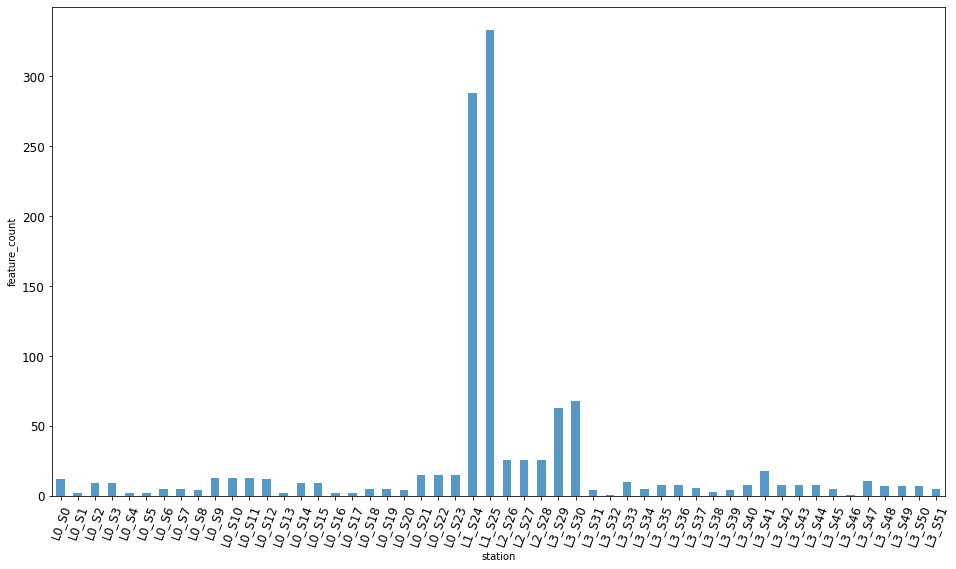

In [61]:
plot_feature_count("train_date.csv")

Date data shows similar patterns, as date data is directly connected to the numeric dataset (date-columns correspond to numeric columns; see dataset description). Timestamps range from close to 0 (purple) up to more than 1600 (yellow) time units. Time units are unknown. Time measures do not drastically change over the course of the production process and stay within their heat-color. Values are monotonically increasing. There is no visible ordering in data rows, as timestamps can start with either low (purple), medium (cyan) or high values (yellow).

<AxesSubplot:>

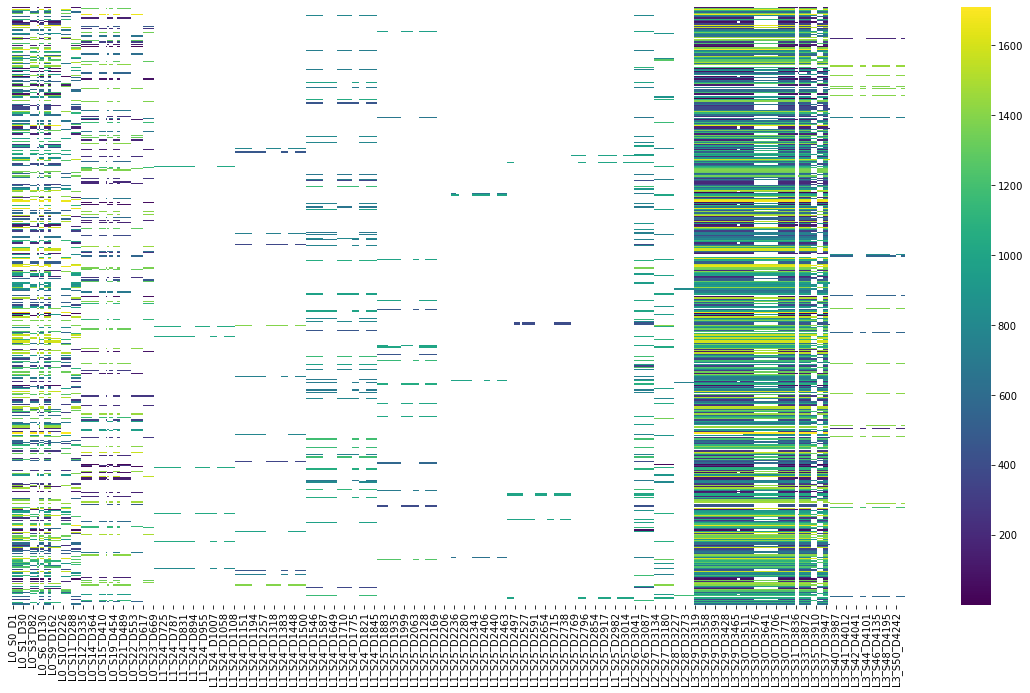

In [111]:
#heatmap 1 for first 100.000 rows in date
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_date.csv", nrows=100000).iloc[0:500, 1:], yticklabels=False, cbar=True, cmap='viridis')

Similar patterns as in heatmap 1.

<AxesSubplot:>

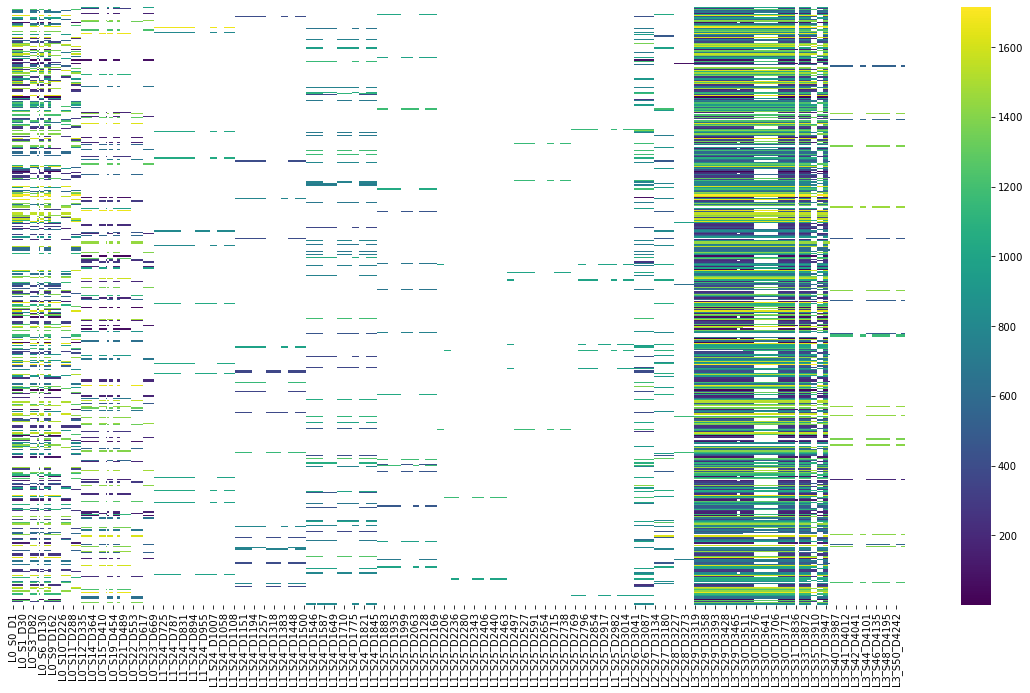

In [113]:
#heatmap 2 for the last 100.000 rows in date
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_date.csv", skiprows=range(1,1183748-100000+1), 
                        nrows=100000).iloc[0:500, 1:], yticklabels=False, cbar=True, cmap='viridis')

In [20]:
#create an iterator for date dataset
train_date_chunks=pd.read_csv('train_date.csv', iterator=True, chunksize=100000)

In [23]:
#function for parsing through imported dataframes. requires iterator=True.
def get_data_frame(dataframe):
    for data_frame in dataframe:
        yield data_frame

#create generator object get_df_date for iteration
get_df_date = get_data_frame(train_date_chunks)

df_date_measures = pd.DataFrame({'Start': [], 'End': [], 'Span': []})

df_date=next(get_df_date)

random.seed(34)

#iterate through date data and sample min, max, span for 10 random timestamps
while (df_date.index[-1]<1183746):
    for i in range(0,10):
        row=random.randrange(df_date.index[0], df_date.index[-1])
        df_date_measures=df_date_measures.append({'Start': df_date.loc[row, 'L0_S0_D1':].describe()['min'], 
                                'End': df_date.loc[row, 'L0_S0_D1':].describe()['max'], 
                                 'Span': abs(df_date.loc[row, 'L0_S0_D1':].describe()['max']-df_date.loc[row, 'L0_S0_D1':].describe()['min'])}, 
                                                ignore_index=True)
    try:
        df_date = next(get_df_date)
    except:
        break

Sampled date data reveals a minimum timestamp for production start of 1.42 and a maximum of 1662.26. 
As for production end, minimum timestamp is 1.45 and maximum is 1662.35. Time spans range from at least 0.03 to 
61.16, where mean span equals 8.79 time units.

However, time units are unknown. Following the autocorrelation analysis from https://www.kaggle.com/gaborfodor/notebookd19d11e4f2, a time value of 0.01 = 6 minutes. Assuming this is true, the mean time span for this sample(!) equals 5279.4 minutes or 88 h. 

In [24]:
df_date_measures

,Start,End,Span
0,1006.25,1028.89,22.64
1,15.29,21.02,5.73
2,1210.09,1211.50,1.41
3,913.39,922.53,9.14
4,204.47,216.39,11.92
...,...,...,...
95,1095.31,1096.04,0.73
96,534.57,538.06,3.49
97,1125.71,1175.02,49.31
98,625.86,633.37,7.51


In [25]:
df_date_measures.describe()

,Start,End,Span
count,100.000000,100.000000,100.000000
mean,802.367600,811.166600,8.799000
std,508.380354,509.311842,12.489899
min,1.420000,1.450000,0.030000
25%,338.792500,345.320000,1.607500
50%,767.075000,792.780000,3.265000
75%,1196.425000,1209.590000,9.145000
max,1662.260000,1662.350000,55.630000


Categorical data is the last part of Bosch Production Line.

In [26]:
#display first rows of categorical data
pd.read_csv('train_categorical.csv', nrows=10)

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
train_categorical=pd.read_csv('train_categorical.csv', nrows=1)
categorical_columns=train_categorical.columns.tolist()
categorical_columns_unique=np.unique([x[0:6] for x in categorical_columns])

In [28]:
#number of columns for categorical data, including id
len(categorical_columns)

2141

In [29]:
#list of categorical stations (Id omitted)
categorical_columns_unique[1:]

array(['L0_S10', 'L0_S11', 'L0_S14', 'L0_S15', 'L0_S16', 'L0_S18',
       'L0_S1_', 'L0_S21', 'L0_S22', 'L0_S23', 'L0_S2_', 'L0_S3_',
       'L0_S4_', 'L0_S6_', 'L0_S9_', 'L1_S24', 'L1_S25', 'L2_S26',
       'L2_S27', 'L2_S28', 'L3_S29', 'L3_S30', 'L3_S31', 'L3_S32',
       'L3_S35', 'L3_S36', 'L3_S38', 'L3_S39', 'L3_S42', 'L3_S43',
       'L3_S44', 'L3_S46', 'L3_S47', 'L3_S49'], dtype='<U6')

Categorical data has least number of stations (34) compared to numeric (50) and date data (52).

In [30]:
#number of stations for categorical data
len(categorical_columns_unique[1:])

34

In [31]:
#first 10 features
[x[3:] for x in categorical_columns[1:]][0:10]

['S1_F25',
 'S1_F27',
 'S1_F29',
 'S1_F31',
 'S2_F33',
 'S2_F35',
 'S2_F37',
 'S2_F39',
 'S2_F41',
 'S2_F43']

Station 24 has most features (660). Station 32 and 46 only have 3 features each.

In [32]:
#count features for each station
Counter([x[3:6] for x in categorical_columns[1:]]).most_common()

[('S24', 660),
 ('S25', 567),
 ('S30', 204),
 ('S29', 63),
 ('S26', 53),
 ('S27', 53),
 ('S28', 53),
 ('S21', 45),
 ('S22', 45),
 ('S9_', 39),
 ('S10', 39),
 ('S47', 33),
 ('S23', 30),
 ('S11', 26),
 ('S42', 24),
 ('S43', 24),
 ('S49', 21),
 ('S2_', 18),
 ('S3_', 18),
 ('S14', 18),
 ('S35', 18),
 ('S6_', 10),
 ('S18', 10),
 ('S15', 9),
 ('S31', 8),
 ('S36', 8),
 ('S39', 8),
 ('S44', 8),
 ('S4_', 6),
 ('S16', 6),
 ('S38', 6),
 ('S1_', 4),
 ('S32', 3),
 ('S46', 3)]

Visualization of feature count per station for categorical data.

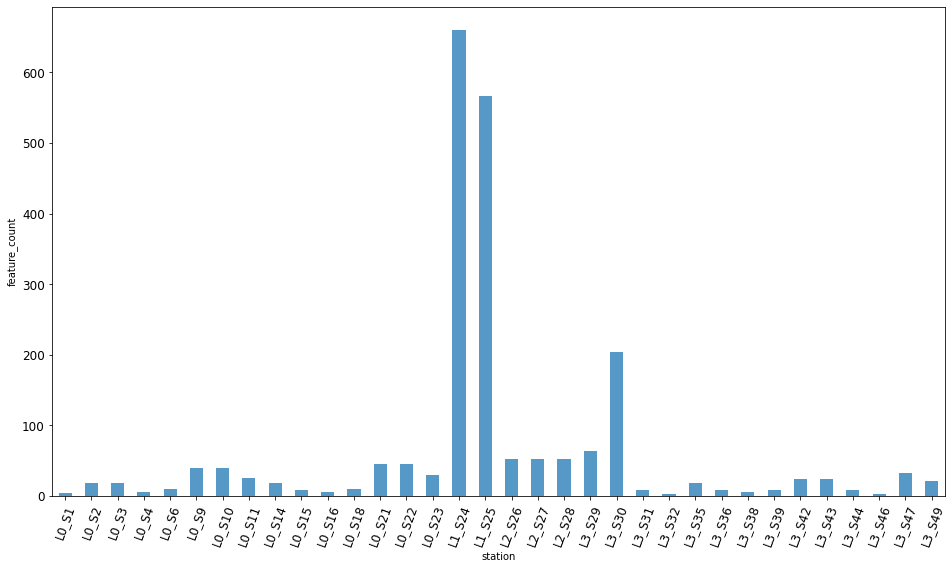

In [62]:
plot_feature_count("train_categorical.csv")

Categorical data has mostly NaN values (yellow). Valid values (purple) from station 26-28 on line 2 and from station 29 on line 3 correspond to measurements in date and numeric. Interestingly, there is no categorical data in station 30-37 in line 3. Between station 44 and 49 on line 3 there is a pattern of categorical values with equally sized gaps in between only occuring when there were no previous categorical values in station 29.

<AxesSubplot:>

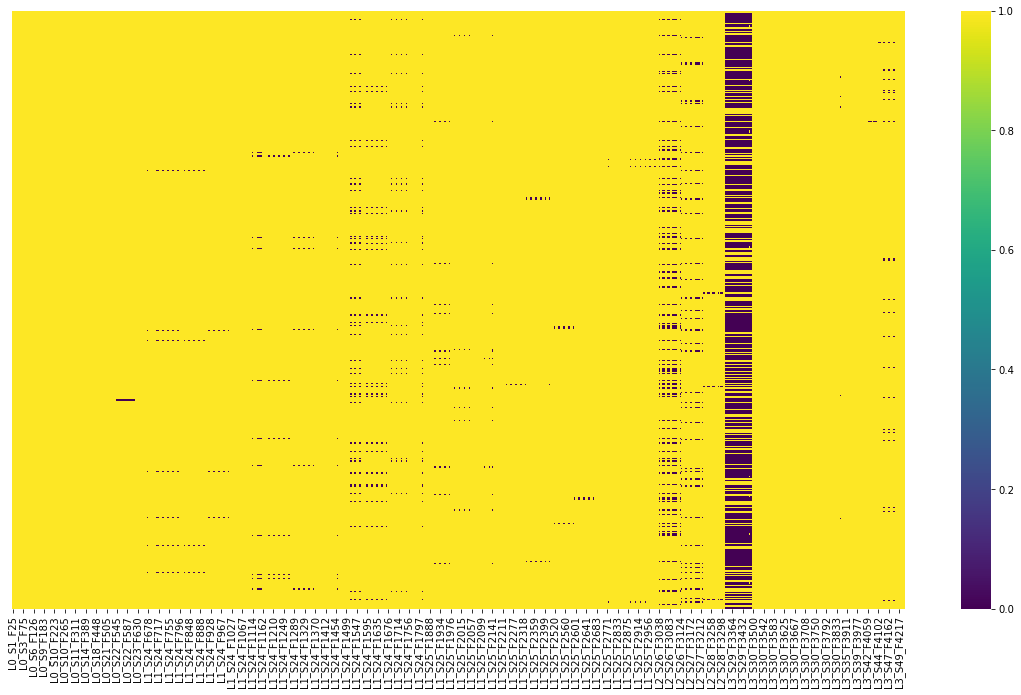

In [34]:
#heatmap 1 for first 100.000 rows in categorical
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_categorical.csv", nrows=100000, low_memory=False).iloc[0:500, 1:].isnull(), 
            yticklabels=False, cbar=True, cmap='viridis')

<AxesSubplot:>

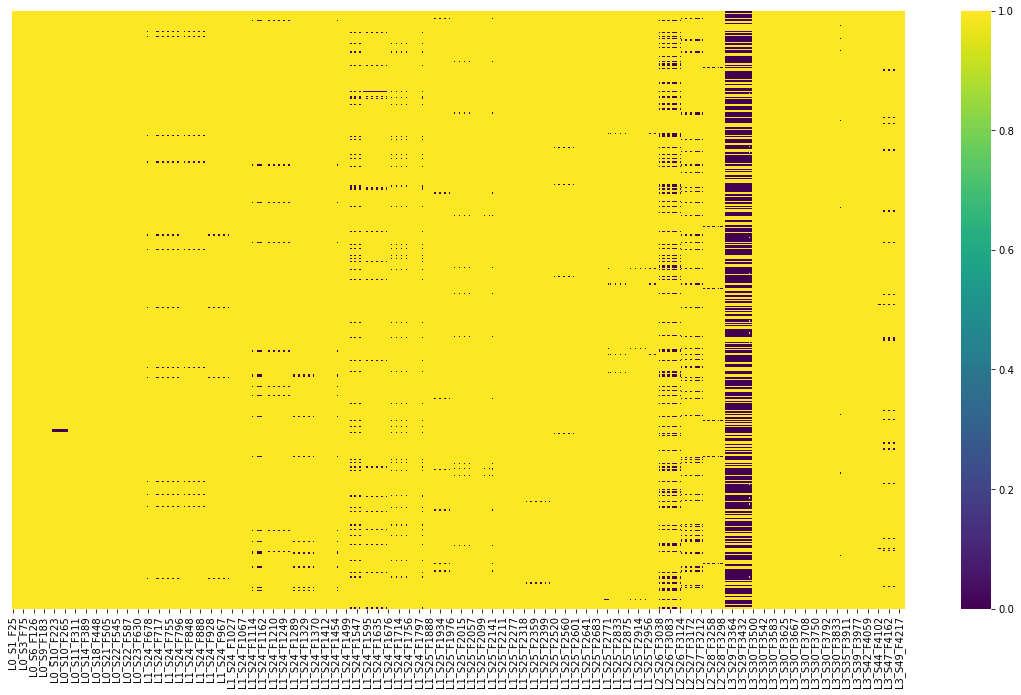

In [35]:
#heatmap 2 for the last 100.000 rows in categorical data
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_categorical.csv", skiprows=range(1,1183748-100000+1), 
                        nrows=100000, low_memory=False).iloc[0:500, 1:].isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [37]:
#get unique categorical values for the first 5000 rows
unique_categorical_values=[]

categorical_sample=pd.read_csv('train_categorical.csv', nrows=5000, low_memory=False)

for col in categorical_sample.iloc[:,1:]:
    unique_categorical_values.append(categorical_sample[col].unique())
    
categorical_list=[elem for i in unique_categorical_values for elem in i]
stringlist = [str(x) for x in categorical_list]
newlist = [x for x in stringlist if x != 'nan']
sorted(list(set(newlist)))

['T-2147482816',
 'T1',
 'T128',
 'T1310',
 'T1372',
 'T143',
 'T145',
 'T16',
 'T16777232',
 'T16777557',
 'T2',
 'T256',
 'T3',
 'T4',
 'T5',
 'T512',
 'T6',
 'T65536',
 'T7',
 'T786432',
 'T8']

In [38]:
#create a dictionary for categorical values for this sample
newlist_counter=Counter(newlist)
newlist_counter_sorted=dict(sorted(newlist_counter.items(), key=lambda pair: pair[1], reverse=True))
newlist_counter

In [40]:
#give each unique category (key) a specific numeric value
for i, x in zip(newlist_counter_sorted, range(1,len(newlist_counter_sorted)+1)):
    newlist_counter_sorted.update({i:x*10})
    
#take a sample from categorical data
cat_sample=pd.read_csv('train_categorical.csv', nrows=5000, low_memory=False)

key_list=list(newlist_counter_sorted.keys())
value_list=list(newlist_counter_sorted.values())
cat_dictionary = dict(zip(key_list, value_list))
cat_dictionary

In [45]:
for column in cat_sample.iloc[:, 1:]: 
    cat_sample.replace({column:cat_dictionary}, inplace=True)

Compared to the big data accumulation in numerical and date data, we can spot a similar pattern and occurence of category 'T1' in all features of station 29 on line 3. However, in numerical and date data, value accumulations on line 3 ranged from station 29 to around station 37.

<AxesSubplot:>

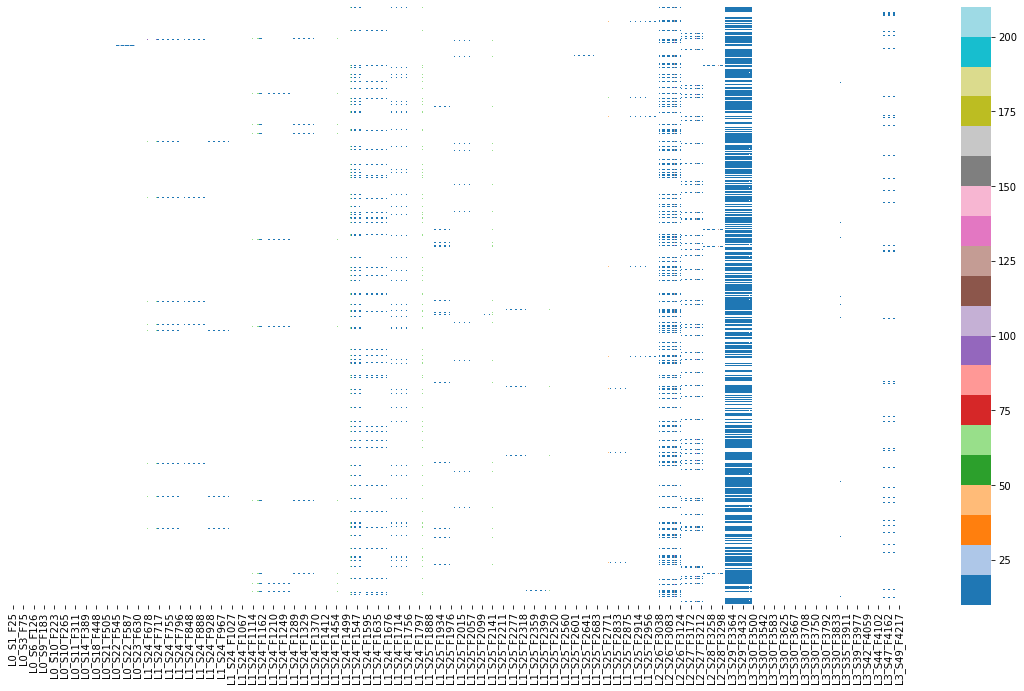

In [46]:
plt.figure(figsize = (20,11))
sns.heatmap(cat_sample.iloc[1:5000, 1:], yticklabels=False, cbar=True, cmap='tab20')

When having a closer look, we can identify categories 'T3': 60, 'T4': 40, 'T5': 110, 'T6': 140 at the transition between station 24 and 25 on line 1. These categories might be used to identify different types of workpieces/products.

<AxesSubplot:>

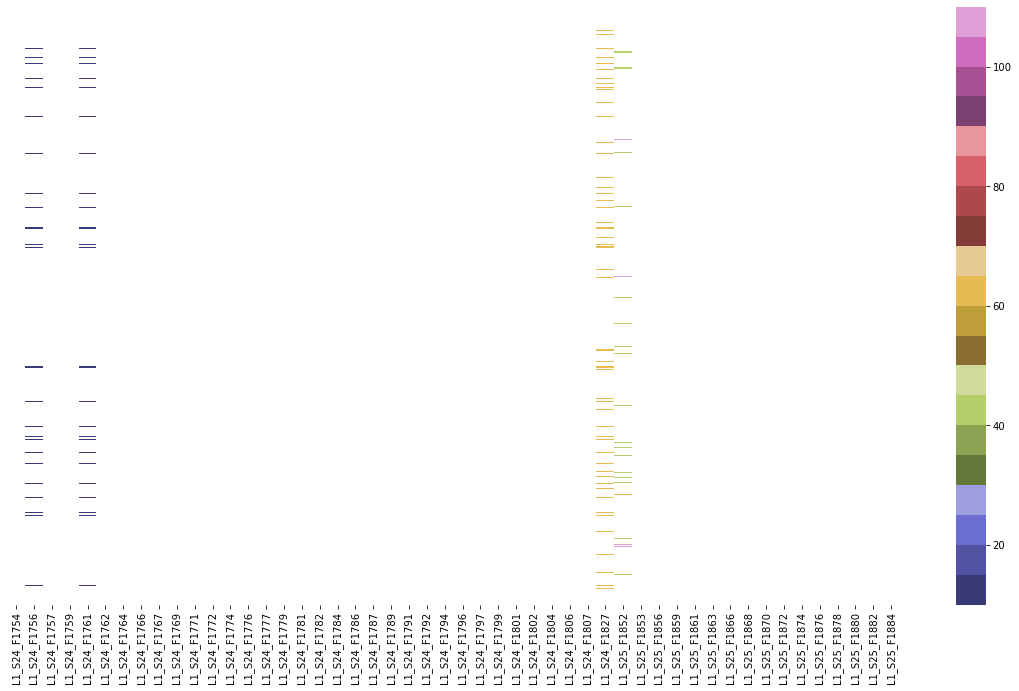

In [85]:
plt.figure(figsize = (20,11))
sns.heatmap(cat_sample.iloc[1000:3000, 950:1000], yticklabels=False, cbar=True, cmap='tab20b')

In [47]:
#unique categorical values for L1_S24_F1827
sorted(cat_sample['L1_S24_F1827'].unique())

[nan, 60.0]

In [48]:
#unique categorical values for L1_S25_F1852
sorted(cat_sample['L1_S25_F1852'].unique())

[nan, 40.0, 60.0, 110.0, 140.0]

Here we can see features of station 29 on line 3 contain 'T1' category. Several workpieces are not measured (white spaces).

<AxesSubplot:>

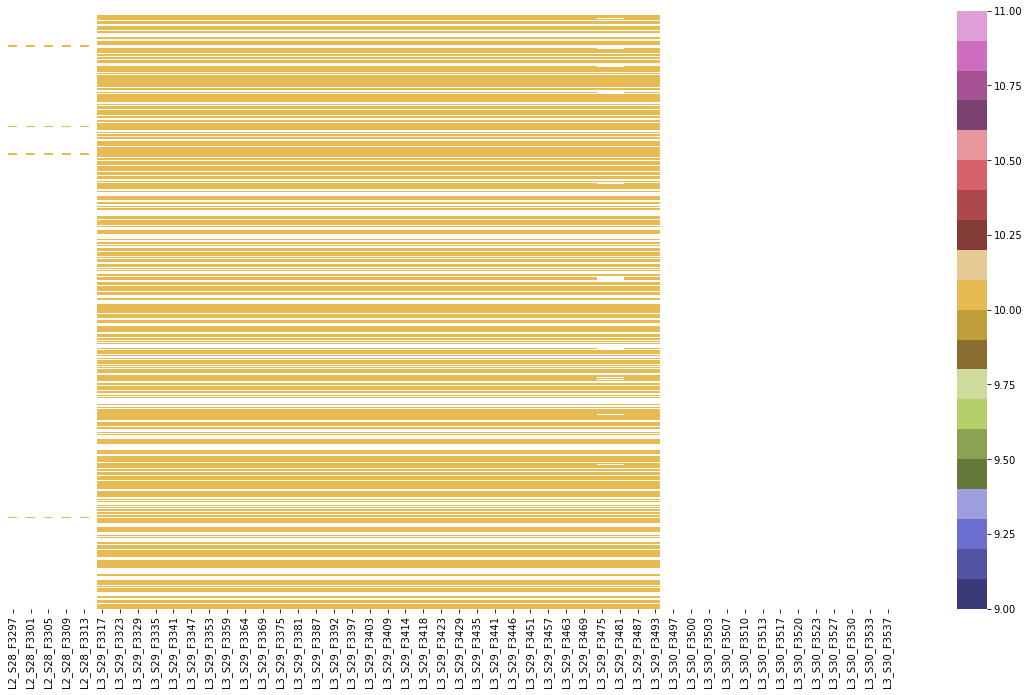

In [102]:
plt.figure(figsize = (20,11))
sns.heatmap(cat_sample.iloc[2500:3000, 1700:1800], yticklabels=False, cbar=True, cmap='tab20b')

After station 29 we identified mostly white space (no measures). A few measures of categories 'T1' and 'T65536' can be found around station 43 and 47 on line 3.

<AxesSubplot:>

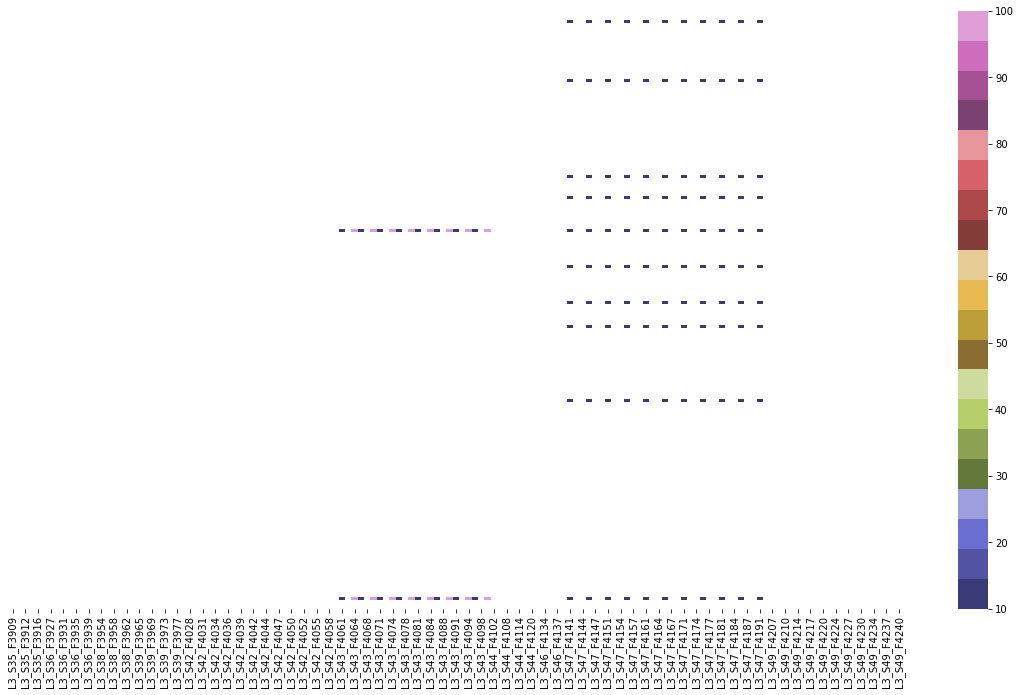

In [118]:
plt.figure(figsize = (20,11))
sns.heatmap(cat_sample.iloc[1000:1200, 2000:], yticklabels=False, cbar=True, cmap='tab20b')

For more information on mapping of Bosch Production Line, please refer to code_for_seminar_paper-final.ipynb